### Linear Models for Classification 

Linear models are extensively used for classification. The formula looks similair to linear regression - except if the function is smaller than 0, we classify as -1, if larger than 0, classify as 1. 

For linear models for classification, the decision boundary is a linear function of the input. A binary classifier seperates two classes using a line/plane/or hyperplane. 

The two most common linear classifications include **Logistic Regression**, and **Linear support vector machines** (Linear SVM).

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


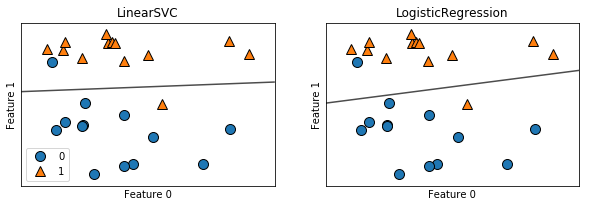

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

Both models come up with similiar boundary, and both apply an L2 Regularization. There is a tradeoff parameter that determines the strength of the regularization called C. Higher C tries to fit the training data as best as possible, and will stress the importance of each individual data point being classfied correctly. Low values of C will cause the algorithm to adjust to the majority, and emphasize coefficient vector *w* being close to 0.

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

print('\n---Using C = 1----')
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

print('\n---Using C = 100----')
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

print("\n Using L1 Regularization, C = 1")
logreg = LogisticRegression(penalty = "l1").fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

print('\n---Using C = 100 and L1 Reg----')
logreg100 = LogisticRegression(C=100, penalty = "l1").fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))


---Using C = 1----
Training set score: 0.955
Test set score: 0.958

---Using C = 100----
Training set score: 0.972
Test set score: 0.965

 Using L1 Regularization, C = 1
Training set score: 0.960
Test set score: 0.958

---Using C = 100 and L1 Reg----
Training set score: 0.986
Test set score: 0.979


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
